# IA 340 Mini Project
**Project Title:** Car Specifications and Prices Trends

## Research Question:
Can a non-fully electric car's price be accurately predicted by engine displacement, horsepower, top speed, and performance?

## Dataset Documentation:
**Source:** https://www.kaggle.com/datasets/abdulmalik1518/cars-datasets-2025?resource=download (Kaggle.com)

**Description:** This is a dataset with information about a wide variety of cars. It covers brand, model, engine type, engine displacement, horsepower, top speed, performance (0-100 kmh), price, fuel type, seats, ad torque. 

**Time period:** 2025

**Reason for Choice:** It directly relates to the research question due to having the essential information for key aspects of cars, and listing the price of the cars. I am also extremely interested in cars, in whic I have some familiarity with this kind of data. 



## Import Data

In [1]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd

# Use latin1 encoding instead of utf-8
df = pd.read_csv('s3://kdr-ia-340-2025/Cars Datasets 2025.csv', encoding='latin1')

# Check first few rows
df.head()


,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990 cc,963 hp,340 km/h,2.5 sec,"$1,100,000",plug in hyrbrid,2,800 Nm
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563 hp,250 km/h,5.3 sec,"$460,000",Petrol,5,900 Nm
2,Ford,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165 km/h,10.5 sec,"$12,000-$15,000",Petrol,5,100 - 140 Nm
3,MERCEDES,GT 63 S,V8,"3,982 cc",630 hp,250 km/h,3.2 sec,"$161,000",Petrol,4,900 Nm
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602 hp,320 km/h,3.6 sec,"$253,290",Petrol,2,560 Nm


## Data Cleaning

In [2]:
import pandas as pd
import numpy as np
import re

df.columns = df.columns.str.strip().str.replace(r'\s+', '_', regex=True)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company_Names              1218 non-null   object
 1   Cars_Names                 1218 non-null   object
 2   Engines                    1218 non-null   object
 3   CC/Battery_Capacity        1215 non-null   object
 4   HorsePower                 1218 non-null   object
 5   Total_Speed                1218 non-null   object
 6   Performance(0_-_100_)KM/H  1212 non-null   object
 7   Cars_Prices                1218 non-null   object
 8   Fuel_Types                 1218 non-null   object
 9   Seats                      1218 non-null   object
 10  Torque                     1217 non-null   object
dtypes: object(11)
memory usage: 104.8+ KB


,Company_Names,Cars_Names,Engines,CC/Battery_Capacity,HorsePower,Total_Speed,Performance(0_-_100_)KM/H,Cars_Prices,Fuel_Types,Seats,Torque
count,1218,1218,1218,1215,1218,1218,1212,1218,1218,1218,1217
unique,37,1201,356,311,456,114,180,535,23,19,263
top,Nissan,911 Carrera 4,I4,1984 cc,355 hp,250 km/h,6.5 sec,"$35,000",Petrol,5,400 Nm
freq,149,2,64,31,23,145,45,36,871,692,72


Standardizing the column names. 

In [3]:
#drop electric-only vehicles
df = df[~df['Fuel_Types'].str.lower().str.contains('electric', na=False)]

Don't need to look at electric cars given the context of the question, so dropping these rows. 

In [4]:
#define function for eliminating ranges
def extract_number(value):
    """Extract the first numeric value (lower number if a range)."""
    if pd.isna(value):
        return np.nan
    value = str(value)
    numbers = re.findall(r'\d+(?:,\d+)*(?:\.\d+)?', value)
    if not numbers:
        return np.nan
    num = numbers[0]
    return float(num.replace(',', ''))

#apply function
cols_to_clean = [
    'CC/Battery_Capacity',
    'HorsePower',
    'Total_Speed',
    'Performance(0_-_100_)KM/H',
    'Cars_Prices',
    'Seats',
    'Torque'
]

for col in cols_to_clean:
    df[col] = df[col].apply(extract_number)

df = df.dropna()

df.head()

,Company_Names,Cars_Names,Engines,CC/Battery_Capacity,HorsePower,Total_Speed,Performance(0_-_100_)KM/H,Cars_Prices,Fuel_Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990.0,963.0,340.0,2.5,1100000.0,plug in hyrbrid,2.0,800.0
1,ROLLS ROYCE,PHANTOM,V12,6749.0,563.0,250.0,5.3,460000.0,Petrol,5.0,900.0
2,Ford,KA+,1.2L Petrol,1200.0,70.0,165.0,10.5,12000.0,Petrol,5.0,100.0
3,MERCEDES,GT 63 S,V8,3982.0,630.0,250.0,3.2,161000.0,Petrol,4.0,900.0
4,AUDI,AUDI R8 Gt,V10,5204.0,602.0,320.0,3.6,253290.0,Petrol,2.0,560.0


The code above is cleaning the values in the chart that are ranges, such as the car price for the Ford KA+ being 12,000-15,000. the code splits this into two values with the given numbers of the range, and replaces the full range with the lower value. Ranges for any of the columns are generally for different upgrades/added features to the cars, so the lower number will reflect the base model car and thus give us the most reliable data. The function is being defined first, and then the function is applied to each of the columns. Also, any values with NaN or missing values are dropped at the end of it. 

In [5]:
#Final Cleaning
df.rename(columns={'Company_Names': 'Make'}, inplace=True)
df['Make'] = df['Make'].str.upper()


df.rename(columns={'CC/Battery_Capacity': 'Displacement(cc)'}, inplace=True)
df.rename(columns={'Performance(0_-_100_)KM/H': 'Performance(0-100_KMH)'}, inplace=True)
df.rename(columns={'Cars_Names': 'Model'}, inplace=True)
df.rename(columns={'Total_Speed': 'Top_Speed(KMH)'}, inplace=True)

df = df.sort_values(by=['Make', 'Model'])


df.head()

,Make,Model,Engines,Displacement(cc),HorsePower,Top_Speed(KMH),Performance(0-100_KMH),Cars_Prices,Fuel_Types,Seats,Torque
943,ACURA,ILX Premium,I4,2400.0,201.0,200.0,6.6,30000.0,Petrol,5.0,180.0
956,ACURA,ILX Special Edition,Inline-4,2400.0,201.0,200.0,6.6,30000.0,Petrol,5.0,180.0
952,ACURA,ILX Technology Package,Inline-4,2400.0,201.0,200.0,6.6,30000.0,Petrol,5.0,180.0
963,ACURA,ILX Technology Plus,Inline-4,2400.0,201.0,200.0,6.6,28000.0,Petrol,5.0,180.0
941,ACURA,MDX Advance,V6,3500.0,290.0,190.0,6.0,60000.0,Petrol,7.0,362.0


Finishing touches for cleaning the data and ordering it by make and model. 

## Process/Aggregate

In [6]:
# creating summary table
import pandas as pd

# price bins
df['Price_Group'] = pd.cut(df['Cars_Prices'],
                           bins=[0, 20000, 40000, 60000, 100000, 200000, 1000000],
                           labels=['<20k', '20k–40k', '40k–60k', '60k–100k', '100k–200k', '200k+'])

# group data into price groups
summary_price = df.groupby('Price_Group')[['Displacement(cc)', 'HorsePower', 'Top_Speed(KMH)', 'Performance(0-100_KMH)']].mean().round(2)

summary_price = summary_price.reset_index()


print(summary_price)

  Price_Group  Displacement(cc)  HorsePower  Top_Speed(KMH)  \
0        <20k           1498.60      104.34          170.62   
1     20k–40k           2108.78      183.90          199.77   
2     40k–60k           2968.38      296.44          218.37   
3    60k–100k           4499.22      395.89          229.53   
4   100k–200k           4158.58      510.87          277.69   
5       200k+           5370.27      614.48          296.92   

   Performance(0-100_KMH)  
0                   11.99  
1                    8.68  
2                    6.68  
3                    6.21  
4                    4.76  
5                    3.78  


This creates a summary table for price groups that shows what the mean value for Displacement, Horsepower, Top Speed, and Performance are for each price range. By viewing how these specifications change across the increasing price groups, it can be noted whether or not there is a constant relationship between a car's specifications and the cost of the car. This can be seen if higher price groups have higher displacements, more horsepower, higher top speeds, and better performance, indicating that increases in these values increase price. 
Due to clear trends from the summary table, it indicates that these variables have explanatory power for price and thus can be used in a regression based analysis. 

## Query

In [7]:
import sqlite3
import pandas as pd

conn = sqlite3.connect(':memory:')

df.to_sql('Cars_Data', conn, index=False, if_exists='replace')

query = """
SELECT *
FROM Cars_Data
WHERE HorsePower > 150
  AND Cars_Prices < 80000
"""
filtered_df = pd.read_sql_query(query, conn)

conn.close()

print(filtered_df.head())


    Make                   Model   Engines  Displacement(cc)  HorsePower  \
0  ACURA             ILX Premium        I4            2400.0       201.0   
1  ACURA     ILX Special Edition  Inline-4            2400.0       201.0   
2  ACURA  ILX Technology Package  Inline-4            2400.0       201.0   
3  ACURA     ILX Technology Plus  Inline-4            2400.0       201.0   
4  ACURA             MDX Advance        V6            3500.0       290.0   

   Top_Speed(KMH)  Performance(0-100_KMH)  Cars_Prices Fuel_Types  Seats  \
0           200.0                     6.6      30000.0     Petrol    5.0   
1           200.0                     6.6      30000.0     Petrol    5.0   
2           200.0                     6.6      30000.0     Petrol    5.0   
3           200.0                     6.6      28000.0     Petrol    5.0   
4           190.0                     6.0      60000.0     Petrol    7.0   

   Torque Price_Group  
0   180.0     20k–40k  
1   180.0     20k–40k  
2   180.0     

This filter narrows the dataset to cars with moderate amount of horsepower, which would be closer to the usual cars seen on the road, and excludes supercars and high end luxury cars by keeping the price under $80,000, which is on the high end of what the average individual can afford for a car. 

## Visualizations

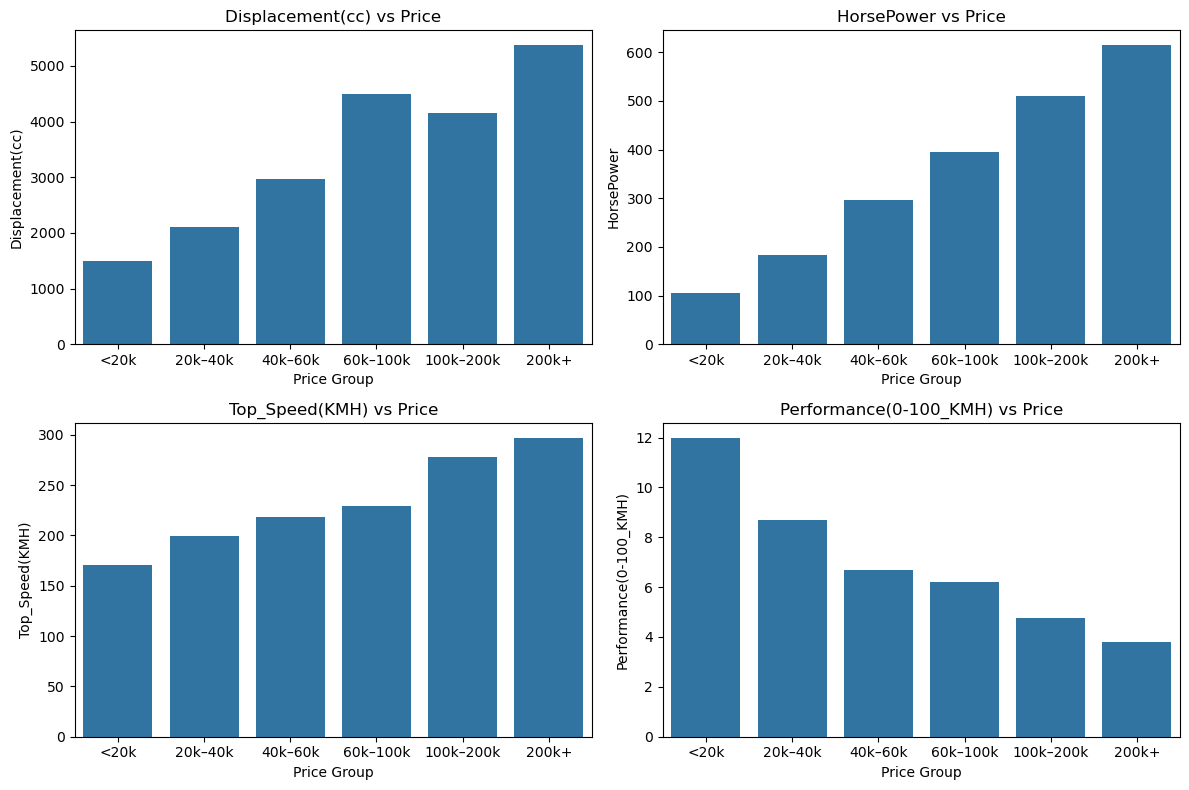

In [14]:
import matplotlib.pyplot as plt

metrics = ['Displacement(cc)', 'HorsePower', 'Top_Speed(KMH)', 'Performance(0-100_KMH)']

fig, axes = plt.subplots(2,2, figsize=(12,8))

for i, metric in enumerate(metrics):
    ax = axes[i//2, i%2]
    sns.barplot(data=summary_price, x='Price_Group', y=metric, ax=ax)
    ax.set_title(metric + ' vs Price')
    ax.set_xlabel('Price Group')
    ax.set_ylabel(metric)

plt.tight_layout()
plt.show()


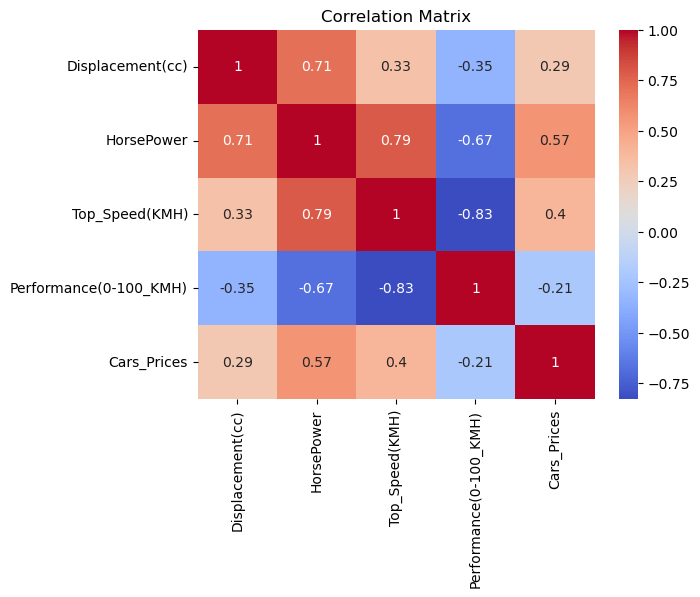

In [11]:
import seaborn as sns
iv_columns = ['Displacement(cc)', 'HorsePower', 'Top_Speed(KMH)', 'Performance(0-100_KMH)']

corr = df[iv_columns + ['Cars_Prices']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()